# Text Classification and Transformation of Book Reviews Using a Pipeline

In [91]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [92]:
df = pd.read_csv('bookReviewsData.csv')

In [93]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [94]:
y = df['Positive Review']
X = df['Review']

In [95]:
X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

In [96]:
X.shape

(1973,)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [98]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [99]:
print(X_test_tfidf)

  (0, 18965)	0.059491023406618646
  (0, 18727)	0.08752131471965732
  (0, 18642)	0.03533743581074492
  (0, 18593)	0.03466402255636781
  (0, 18539)	0.10400005525124341
  (0, 18496)	0.09274785194457173
  (0, 18455)	0.0276659188493222
  (0, 18126)	0.051656463721148134
  (0, 17733)	0.1213832032593689
  (0, 17680)	0.1213832032593689
  (0, 17618)	0.06952952155086067
  (0, 17302)	0.047594430972735094
  (0, 17259)	0.0725088662135299
  (0, 17226)	0.04030762713391491
  (0, 17133)	0.1295180018700078
  (0, 17117)	0.049162328805929446
  (0, 17104)	0.07672093808666652
  (0, 17066)	0.047152835152653096
  (0, 17061)	0.04603216704495873
  (0, 17053)	0.043249080127104864
  (0, 17044)	0.03390923842467748
  (0, 17040)	0.02324158038379852
  (0, 16805)	0.05557793152499216
  (0, 16288)	0.1104156579703061
  (0, 16266)	0.05275501870340633
  :	:
  (394, 16266)	0.11591490667341263
  (394, 16183)	0.16526647998794597
  (394, 14669)	0.21441548095429677
  (394, 11847)	0.041179983410956134
  (394, 11711)	0.11266334411

In [100]:
model = LogisticRegression(max_iter = 200)
model.fit(X_train_tfidf, y_train)
test_predict = model.predict_proba(X_test_tfidf)[:, 1]

auc = roc_auc_score(y_test, test_predict)
print('AUC on the test data: {:.4f}'.format(auc))

len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

AUC on the test data: 0.9161
The size of the feature space: 19029


In [101]:
values = [1, 10, 100, 1000]
for min_df in values:
    
    print('\nDocument Frequency Value: {0}'.format(min_df))
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df = min_df)
    tfidf_vectorizer.fit(X_train)

    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    model = LogisticRegression(max_iter = 200)   
    model.fit(X_train_tfidf, y_train)

    probability_predictions = model.predict_proba(X_test_tfidf)[:, 1]

    auc = roc_auc_score(y_test, probability_predictions)
    print('AUC on the test data: {:.4f}'.format(auc))
    
    len_feature_space = len(tfidf_vectorizer.vocabulary_)
    print('The size of the feature space: {0}'.format(len_feature_space))


Document Frequency Value: 1
AUC on the test data: 0.9310
The size of the feature space: 143560

Document Frequency Value: 10
AUC on the test data: 0.9254
The size of the feature space: 4257

Document Frequency Value: 100
AUC on the test data: 0.8625
The size of the feature space: 279

Document Frequency Value: 1000
AUC on the test data: 0.6557
The size of the feature space: 10


In [102]:
from sklearn.pipeline import Pipeline

In [103]:
print('Begin ML pipeline...')

s = [
        ("vectorizer", TfidfVectorizer(ngram_range=(1,2), min_df=10)),
        ("model", LogisticRegression(max_iter=200))
    ]

model_pipeline = Pipeline(steps=s)
model_pipeline.fit(X_train, y_train)
probability_predictions = model_pipeline.predict_proba(X_test)[:, 1]
print('End pipeline')

Begin ML pipeline...
End pipeline


In [104]:
auc_score = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc_score))

AUC on the test data: 0.9254


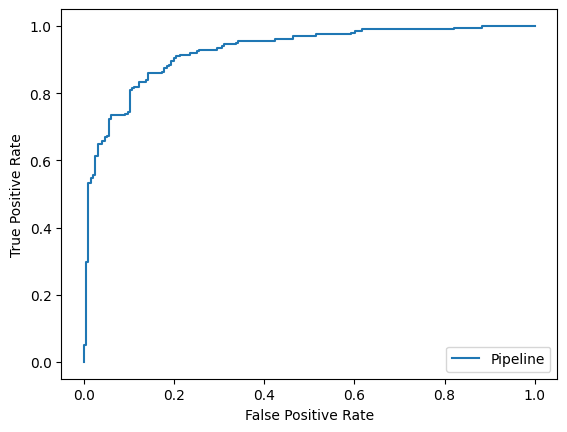

In [105]:
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='Pipeline').plot()
plt.show()

In [106]:
model_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'model', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__norm', 'vectorizer__preprocessor', 'vectorizer__smooth_idf', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__sublinear_tf', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__use_idf', 'vectorizer__vocabulary', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [107]:
param_grid = {
    'model__C': [0.1, 1, 10],
    'vectorizer__ngram_range': [(1, 1), (1, 2)]
}

param_grid

{'model__C': [0.1, 1, 10], 'vectorizer__ngram_range': [(1, 1), (1, 2)]}

In [108]:
print('Running Grid Search...')
grid = GridSearchCV(model_pipeline, param_grid, cv = 3, scoring = 'roc_auc', verbose = 2)
grid_search = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .......model__C=0.1, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END .......model__C=0.1, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END .......model__C=0.1, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END .......model__C=0.1, vectorizer__ngram_range=(1, 2); total time=   0.3s
[CV] END .......model__C=0.1, vectorizer__ngram_range=(1, 2); total time=   0.4s
[CV] END .......model__C=0.1, vectorizer__ngram_range=(1, 2); total time=   0.5s
[CV] END .........model__C=1, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END .........model__C=1, vectorizer__ngram_range=(1, 1); total time=   0.2s
[CV] END .........model__C=1, vectorizer__ngram_range=(1, 1); total time=   0.2s
[CV] END .........model__C=1, vectorizer__ngram_range=(1, 2); total time=   0.5s
[CV] END .........model__C=1, vectorizer__ngram_range=(1, 2); total time=   0.4s
[CV] END .........model__C

In [109]:
grid_search.best_estimator_

Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=10, ngram_range=(1, 2))),
                ('model', LogisticRegression(C=10, max_iter=200))])

In [110]:
grid_search.best_params_

{'model__C': 10, 'vectorizer__ngram_range': (1, 2)}

AUC: 0.9199


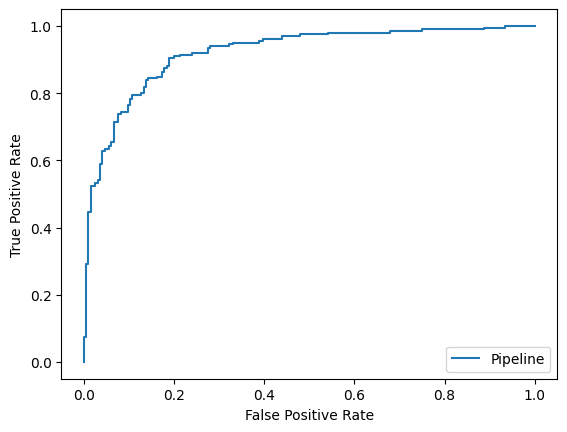

In [111]:
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='Pipeline').plot()
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")
plt.show()